# Hacking with Pandas

## Masks (boolean array) vs query

Filter the year 2021

In [ ]:
import pandas as pd

df_energy = pd.read_csv('all-technology_2019-2021.csv', index_col=0)
df_energy

,technology,year,month,day,hour,generation_mwh
0,Carbon,2019,1,1,0,1867.0
1,Carbon,2019,1,1,1,1618.0
...,...,...,...,...,...,...
420862,Other Renewables,2021,12,31,22,607.5
420863,Other Renewables,2021,12,31,23,591.6


### Dummy solution

In [61]:
mask_year = df_energy.year == 2021
dff = df_energy[mask_year]
dff

,technology,year,month,day,hour,generation_mwh
17544,Carbon,2021,1,1,0,250.0
17545,Carbon,2021,1,1,1,250.0
...,...,...,...,...,...,...
420862,Other Renewables,2021,12,31,22,607.5
420863,Other Renewables,2021,12,31,23,591.6


### Proficient solution

In [62]:
dff = df_energy.query('year == 2021')
dff

,technology,year,month,day,hour,generation_mwh
17544,Carbon,2021,1,1,0,250.0
17545,Carbon,2021,1,1,1,250.0
...,...,...,...,...,...,...
420862,Other Renewables,2021,12,31,22,607.5
420863,Other Renewables,2021,12,31,23,591.6


## Query with multiple conditions

Filter the year `2021` and `Eolic` technology:

### Dummy solution

In [85]:
mask_2021 = df_energy.year == 2021
mask_eolic = df_energy.technology == 'Eolic'
dff = df_energy[mask_2021 & mask_eolic]
dff

,technology,year,month,day,hour,generation_mwh
122760,Eolic,2021,1,1,0,8557.5
122761,Eolic,2021,1,1,1,8661.6
...,...,...,...,...,...,...
131518,Eolic,2021,12,31,22,6081.8
131519,Eolic,2021,12,31,23,6255.3


### Proficient solution

In [88]:
dff = df_energy.query('year == 2021 & technology == "Eolic"')
dff

,technology,year,month,day,hour,generation_mwh
122760,Eolic,2021,1,1,0,8557.5
122761,Eolic,2021,1,1,1,8661.6
...,...,...,...,...,...,...
131518,Eolic,2021,12,31,22,6081.8
131519,Eolic,2021,12,31,23,6255.3


## Filter rows with regular expressions

Filter all `fiat` from the following `DataFrame`:

In [71]:
import seaborn as sns

df_mpg = sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


### Dummy solution

In [72]:
list_fiat = ['fiat 124b', 'fiat 124 sport coupe', 'fiat 128', 'fiat 128', 'fiat 124 tc', 'fiat x1.9', 'fiat 131', 'fiat strada custom']

mask_fiat = df_mpg.name.isin(list_fiat)
dff = df_mpg[mask_fiat]
dff

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
52,30.0,4,88.0,76.0,2065,14.5,71,europe,fiat 124b
114,26.0,4,98.0,90.0,2265,15.5,73,europe,fiat 124 sport coupe
117,29.0,4,68.0,49.0,1867,19.5,73,europe,fiat 128
147,24.0,4,90.0,75.0,2108,15.5,74,europe,fiat 128
148,26.0,4,116.0,75.0,2246,14.0,74,europe,fiat 124 tc
151,31.0,4,79.0,67.0,2000,16.0,74,europe,fiat x1.9
182,28.0,4,107.0,86.0,2464,15.5,76,europe,fiat 131
304,37.3,4,91.0,69.0,2130,14.7,79,europe,fiat strada custom


### Proficient solution

In [73]:
mask_fiat = df_mpg.name.str.contains('fiat')
dff = df_mpg[mask_fiat]
dff

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
52,30.0,4,88.0,76.0,2065,14.5,71,europe,fiat 124b
114,26.0,4,98.0,90.0,2265,15.5,73,europe,fiat 124 sport coupe
117,29.0,4,68.0,49.0,1867,19.5,73,europe,fiat 128
147,24.0,4,90.0,75.0,2108,15.5,74,europe,fiat 128
148,26.0,4,116.0,75.0,2246,14.0,74,europe,fiat 124 tc
151,31.0,4,79.0,67.0,2000,16.0,74,europe,fiat x1.9
182,28.0,4,107.0,86.0,2464,15.5,76,europe,fiat 131
304,37.3,4,91.0,69.0,2130,14.7,79,europe,fiat strada custom


## Regex flag to IGNORECASE

Select all `sport` cars from the `name`:

In [74]:
df_mpg['name'] = df_mpg['name'].str.title()
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,Chevrolet Chevelle Malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,Buick Skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,Ford Ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,Chevy S-10


### Dummy solution

In [78]:
mask_sport = df_mpg.name.str.contains('Sport|sport|SPORT')
dff = df_mpg[mask_sport]
dff

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
45,18.0,6,258.0,110.0,2962,13.5,71,usa,Amc Hornet Sportabout (Sw)
114,26.0,4,98.0,90.0,2265,15.5,73,europe,Fiat 124 Sport Coupe
263,17.7,6,231.0,165.0,3445,13.4,78,usa,Buick Regal Sport Coupe (Turbo)


### Proficient solution

In [80]:
import re

mask_sport = df_mpg.name.str.contains('sport', flags=re.IGNORECASE)
dff = df_mpg[mask_sport]
dff

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
45,18.0,6,258.0,110.0,2962,13.5,71,usa,Amc Hornet Sportabout (Sw)
114,26.0,4,98.0,90.0,2265,15.5,73,europe,Fiat 124 Sport Coupe
263,17.7,6,231.0,165.0,3445,13.4,78,usa,Buick Regal Sport Coupe (Turbo)


## Filter axis with Regular Expressions

Select all `fiat` from the following `DataFrame`:

In [66]:
df_mpg = df_mpg.set_index('name')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
...,...,...,...,...,...,...,...,...
ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa
chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,usa


### Dummy solution

In [67]:
mask_fiat = df_mpg.index.str.contains('fiat')
dff = df_mpg[mask_fiat]
dff

Index(['fiat 124b', 'fiat 124 sport coupe', 'fiat 128', 'fiat 128',
       'fiat 124 tc', 'fiat x1.9', 'fiat 131', 'fiat strada custom'],
      dtype='object', name='name')

### Proficient solution

In [68]:
dff = df_mpg.filter(regex='fiat', axis=0)
dff

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
fiat 124b,30.0,4,88.0,76.0,2065,14.5,71,europe
fiat 124 sport coupe,26.0,4,98.0,90.0,2265,15.5,73,europe
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,europe
fiat 128,24.0,4,90.0,75.0,2108,15.5,74,europe
fiat 124 tc,26.0,4,116.0,75.0,2246,14.0,74,europe
fiat x1.9,31.0,4,79.0,67.0,2000,16.0,74,europe
fiat 131,28.0,4,107.0,86.0,2464,15.5,76,europe
fiat strada custom,37.3,4,91.0,69.0,2130,14.7,79,europe


## The DataFrame order matters

Visualize the following `DataFrame` with the bars in decreasing order:

In [91]:
dff = (df_energy
    .query('year == 2021')
    .groupby('technology').generation_mwh.sum()
    .reset_index()
)
dff

,technology,generation_mwh
0,Carbon,5016801.7
1,Cogeneration,26373562.5
...,...,...
14,Total Exports,-20155317.7
15,Total Imports,21604101.0


### Dummy solution

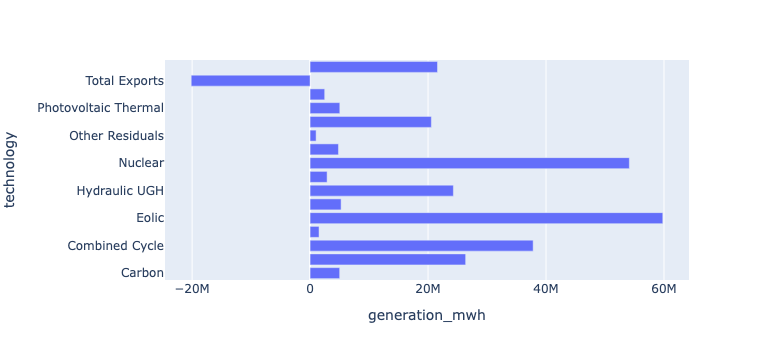

In [93]:
import plotly.express as px

px.bar(data_frame=dff, y='technology', x='generation_mwh')

### Proficient solution

In [94]:
dff = dff.sort_values('generation_mwh')
dff

,technology,generation_mwh
14,Total Exports,-20155317.7
10,Other Residuals,1019779.2
...,...,...
8,Nuclear,54124826.1
4,Eolic,59798598.5


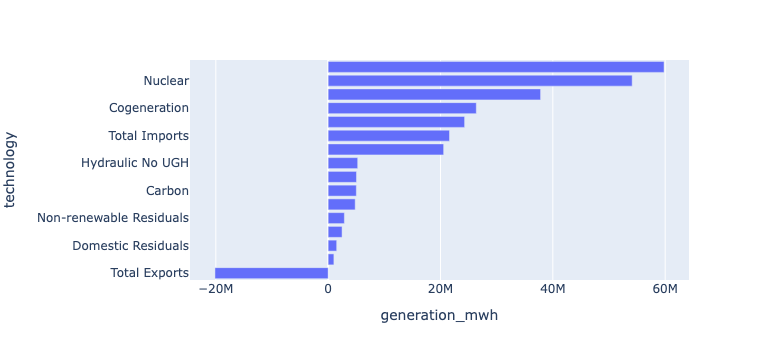

In [95]:
import plotly.express as px

px.bar(data_frame=dff, y='technology', x='generation_mwh')

Also, you may reverse the visualization order `Ascending=False`

In [96]:
dff = dff.sort_values('generation_mwh', ascending=False)
dff

,technology,generation_mwh
4,Eolic,59798598.5
8,Nuclear,54124826.1
...,...,...
10,Other Residuals,1019779.2
14,Total Exports,-20155317.7


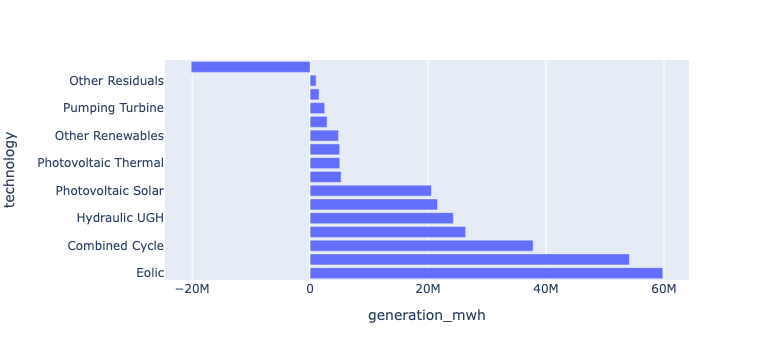

In [97]:
import plotly.express as px

px.bar(data_frame=dff, y='technology', x='generation_mwh')

## Pivot tables vs groupby

Summarise the `generation_mwh` by `technology` and `month`.

In [111]:
dff = df_energy.query('year == 2021')
dff

,technology,year,month,day,hour,generation_mwh
17544,Carbon,2021,1,1,0,250.0
17545,Carbon,2021,1,1,1,250.0
...,...,...,...,...,...,...
420862,Other Renewables,2021,12,31,22,607.5
420863,Other Renewables,2021,12,31,23,591.6


### Dummy solution

In [112]:
(dff
 .groupby(['technology', 'month'])
    .generation_mwh.sum()
 .reset_index()
 )

,technology,month,generation_mwh
0,Carbon,1,569862.6
1,Carbon,2,186166.0
...,...,...,...
190,Total Imports,11,995160.5
191,Total Imports,12,1180193.4


### Proficient solution

In [113]:
dff.pivot_table(index='technology', columns='month', values='generation_mwh', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569862.6,186166.0,250334.3,275498.8,338188.1,433752.1,311105.2,327367.5,484822.4,534670.4,580637.8,724396.5
Cogeneration,2404774.2,1852452.1,2258929.9,2212108.8,2235879.1,2222424.2,2305126.9,2149075.0,2191493.1,2160983.6,2184241.9,2196073.7
...,...,...,...,...,...,...,...,...,...,...,...,...
Total Exports,-1767893.4,-1713308.0,-1560906.7,-1593086.7,-1766213.8,-1145451.6,-1409599.7,-1550998.8,-1301197.9,-1531946.1,-2319110.6,-2495604.4
Total Imports,2019413.2,1555339.1,1797468.1,1886314.9,2061748.8,2217776.5,2145289.0,2317818.8,1854517.1,1573061.6,995160.5,1180193.4


## Highlight the significant values with `background_gradient()`

### Dummy solution

In [114]:
dff = dff.pivot_table(index='technology', columns='month', values='generation_mwh', aggfunc='sum')
dff

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569862.6,186166.0,250334.3,275498.8,338188.1,433752.1,311105.2,327367.5,484822.4,534670.4,580637.8,724396.5
Cogeneration,2404774.2,1852452.1,2258929.9,2212108.8,2235879.1,2222424.2,2305126.9,2149075.0,2191493.1,2160983.6,2184241.9,2196073.7
...,...,...,...,...,...,...,...,...,...,...,...,...
Total Exports,-1767893.4,-1713308.0,-1560906.7,-1593086.7,-1766213.8,-1145451.6,-1409599.7,-1550998.8,-1301197.9,-1531946.1,-2319110.6,-2495604.4
Total Imports,2019413.2,1555339.1,1797468.1,1886314.9,2061748.8,2217776.5,2145289.0,2317818.8,1854517.1,1573061.6,995160.5,1180193.4


### Proficient solution

Colour the following `DataFrame` based on the column values using `.style` property.

In [116]:
dff.style.background_gradient()

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569862.600000,186166.000000,250334.300000,275498.800000,338188.100000,433752.100000,311105.200000,327367.500000,484822.400000,534670.400000,580637.800000,724396.500000
Cogeneration,2404774.200000,1852452.100000,2258929.900000,2212108.800000,2235879.100000,2222424.200000,2305126.900000,2149075.000000,2191493.100000,2160983.600000,2184241.900000,2196073.700000
Combined Cycle,2132026.700000,1036386.900000,1626779.100000,2900945.100000,2011323.400000,3219381.400000,3062721.400000,3339393.100000,4314063.100000,3820749.400000,5783031.600000,4571818.500000
Domestic Residuals,109129.000000,114266.700000,125781.100000,132297.700000,107416.500000,131201.100000,150120.400000,141866.600000,107793.700000,120196.900000,132234.300000,146789.900000
Eolic,7039018.000000,6240847.700000,5534588.500000,4187192.600000,4667701.300000,3548080.900000,4127516.500000,3640296.500000,3189526.300000,4338883.900000,6397522.500000,6887423.800000
Hydraulic No UGH,688163.200000,762889.000000,609469.900000,416865.100000,498588.900000,450602.700000,356037.300000,267556.100000,214598.100000,199206.800000,267486.700000,528224.200000
Hydraulic UGH,3434033.000000,3813742.300000,3134665.200000,2257334.900000,1609724.300000,1700697.800000,1872495.300000,1623821.600000,1184314.800000,796993.400000,890757.400000,1975085.700000
Non-renewable Residuals,230255.400000,217513.100000,238286.100000,234489.000000,217960.800000,249733.400000,276158.500000,270212.100000,226374.300000,241774.400000,237443.400000,245182.900000
Nuclear,5190702.400000,4358016.800000,4830869.200000,4210666.600000,4386141.100000,3710700.600000,5120411.800000,5153025.300000,4896815.500000,4755471.700000,3580181.100000,3931824.000000


## Format the values to shorten decimals

### Dummy solution

In [ ]:
dff.style.background_gradient()

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569862.600000,186166.000000,250334.300000,275498.800000,338188.100000,433752.100000,311105.200000,327367.500000,484822.400000,534670.400000,580637.800000,724396.500000
Cogeneration,2404774.200000,1852452.100000,2258929.900000,2212108.800000,2235879.100000,2222424.200000,2305126.900000,2149075.000000,2191493.100000,2160983.600000,2184241.900000,2196073.700000
Combined Cycle,2132026.700000,1036386.900000,1626779.100000,2900945.100000,2011323.400000,3219381.400000,3062721.400000,3339393.100000,4314063.100000,3820749.400000,5783031.600000,4571818.500000
Domestic Residuals,109129.000000,114266.700000,125781.100000,132297.700000,107416.500000,131201.100000,150120.400000,141866.600000,107793.700000,120196.900000,132234.300000,146789.900000
Eolic,7039018.000000,6240847.700000,5534588.500000,4187192.600000,4667701.300000,3548080.900000,4127516.500000,3640296.500000,3189526.300000,4338883.900000,6397522.500000,6887423.800000
Hydraulic No UGH,688163.200000,762889.000000,609469.900000,416865.100000,498588.900000,450602.700000,356037.300000,267556.100000,214598.100000,199206.800000,267486.700000,528224.200000
Hydraulic UGH,3434033.000000,3813742.300000,3134665.200000,2257334.900000,1609724.300000,1700697.800000,1872495.300000,1623821.600000,1184314.800000,796993.400000,890757.400000,1975085.700000
Non-renewable Residuals,230255.400000,217513.100000,238286.100000,234489.000000,217960.800000,249733.400000,276158.500000,270212.100000,226374.300000,241774.400000,237443.400000,245182.900000
Nuclear,5190702.400000,4358016.800000,4830869.200000,4210666.600000,4386141.100000,3710700.600000,5120411.800000,5153025.300000,4896815.500000,4755471.700000,3580181.100000,3931824.000000


### Proficient solution

In [117]:
(dff
 .style
    .background_gradient()
    .format(precision=2)
)

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569862.60,186166.00,250334.30,275498.80,338188.10,433752.10,311105.20,327367.50,484822.40,534670.40,580637.80,724396.50
Cogeneration,2404774.20,1852452.10,2258929.90,2212108.80,2235879.10,2222424.20,2305126.90,2149075.00,2191493.10,2160983.60,2184241.90,2196073.70
Combined Cycle,2132026.70,1036386.90,1626779.10,2900945.10,2011323.40,3219381.40,3062721.40,3339393.10,4314063.10,3820749.40,5783031.60,4571818.50
Domestic Residuals,109129.00,114266.70,125781.10,132297.70,107416.50,131201.10,150120.40,141866.60,107793.70,120196.90,132234.30,146789.90
Eolic,7039018.00,6240847.70,5534588.50,4187192.60,4667701.30,3548080.90,4127516.50,3640296.50,3189526.30,4338883.90,6397522.50,6887423.80
Hydraulic No UGH,688163.20,762889.00,609469.90,416865.10,498588.90,450602.70,356037.30,267556.10,214598.10,199206.80,267486.70,528224.20
Hydraulic UGH,3434033.00,3813742.30,3134665.20,2257334.90,1609724.30,1700697.80,1872495.30,1623821.60,1184314.80,796993.40,890757.40,1975085.70
Non-renewable Residuals,230255.40,217513.10,238286.10,234489.00,217960.80,249733.40,276158.50,270212.10,226374.30,241774.40,237443.40,245182.90
Nuclear,5190702.40,4358016.80,4830869.20,4210666.60,4386141.10,3710700.60,5120411.80,5153025.30,4896815.50,4755471.70,3580181.10,3931824.00


## From absolute to the thousands

Don't show all digits of the thousands. For example: 20 000 should be 20.

### Dummy solution

In [ ]:
(dff
 .style
    .background_gradient()
    .format(precision=2)
)

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569862.60,186166.00,250334.30,275498.80,338188.10,433752.10,311105.20,327367.50,484822.40,534670.40,580637.80,724396.50
Cogeneration,2404774.20,1852452.10,2258929.90,2212108.80,2235879.10,2222424.20,2305126.90,2149075.00,2191493.10,2160983.60,2184241.90,2196073.70
Combined Cycle,2132026.70,1036386.90,1626779.10,2900945.10,2011323.40,3219381.40,3062721.40,3339393.10,4314063.10,3820749.40,5783031.60,4571818.50
Domestic Residuals,109129.00,114266.70,125781.10,132297.70,107416.50,131201.10,150120.40,141866.60,107793.70,120196.90,132234.30,146789.90
Eolic,7039018.00,6240847.70,5534588.50,4187192.60,4667701.30,3548080.90,4127516.50,3640296.50,3189526.30,4338883.90,6397522.50,6887423.80
Hydraulic No UGH,688163.20,762889.00,609469.90,416865.10,498588.90,450602.70,356037.30,267556.10,214598.10,199206.80,267486.70,528224.20
Hydraulic UGH,3434033.00,3813742.30,3134665.20,2257334.90,1609724.30,1700697.80,1872495.30,1623821.60,1184314.80,796993.40,890757.40,1975085.70
Non-renewable Residuals,230255.40,217513.10,238286.10,234489.00,217960.80,249733.40,276158.50,270212.10,226374.30,241774.40,237443.40,245182.90
Nuclear,5190702.40,4358016.80,4830869.20,4210666.60,4386141.10,3710700.60,5120411.80,5153025.30,4896815.50,4755471.70,3580181.10,3931824.00


### Proficient solution

In [118]:
(dff
 .div(1000)
 .style
    .background_gradient()
    .format(precision=2)
)

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569.86,186.17,250.33,275.50,338.19,433.75,311.11,327.37,484.82,534.67,580.64,724.40
Cogeneration,2404.77,1852.45,2258.93,2212.11,2235.88,2222.42,2305.13,2149.07,2191.49,2160.98,2184.24,2196.07
Combined Cycle,2132.03,1036.39,1626.78,2900.95,2011.32,3219.38,3062.72,3339.39,4314.06,3820.75,5783.03,4571.82
Domestic Residuals,109.13,114.27,125.78,132.30,107.42,131.20,150.12,141.87,107.79,120.20,132.23,146.79
Eolic,7039.02,6240.85,5534.59,4187.19,4667.70,3548.08,4127.52,3640.30,3189.53,4338.88,6397.52,6887.42
Hydraulic No UGH,688.16,762.89,609.47,416.87,498.59,450.60,356.04,267.56,214.60,199.21,267.49,528.22
Hydraulic UGH,3434.03,3813.74,3134.67,2257.33,1609.72,1700.70,1872.50,1623.82,1184.31,796.99,890.76,1975.09
Non-renewable Residuals,230.26,217.51,238.29,234.49,217.96,249.73,276.16,270.21,226.37,241.77,237.44,245.18
Nuclear,5190.70,4358.02,4830.87,4210.67,4386.14,3710.70,5120.41,5153.03,4896.82,4755.47,3580.18,3931.82


## Specify the darkest value

### Dummy solution

In [120]:
dff = dff.div(1000)

(dff
 .style
    .background_gradient()
    .format(precision=2)
)

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569.86,186.17,250.33,275.50,338.19,433.75,311.11,327.37,484.82,534.67,580.64,724.40
Cogeneration,2404.77,1852.45,2258.93,2212.11,2235.88,2222.42,2305.13,2149.07,2191.49,2160.98,2184.24,2196.07
Combined Cycle,2132.03,1036.39,1626.78,2900.95,2011.32,3219.38,3062.72,3339.39,4314.06,3820.75,5783.03,4571.82
Domestic Residuals,109.13,114.27,125.78,132.30,107.42,131.20,150.12,141.87,107.79,120.20,132.23,146.79
Eolic,7039.02,6240.85,5534.59,4187.19,4667.70,3548.08,4127.52,3640.30,3189.53,4338.88,6397.52,6887.42
Hydraulic No UGH,688.16,762.89,609.47,416.87,498.59,450.60,356.04,267.56,214.60,199.21,267.49,528.22
Hydraulic UGH,3434.03,3813.74,3134.67,2257.33,1609.72,1700.70,1872.50,1623.82,1184.31,796.99,890.76,1975.09
Non-renewable Residuals,230.26,217.51,238.29,234.49,217.96,249.73,276.16,270.21,226.37,241.77,237.44,245.18
Nuclear,5190.70,4358.02,4830.87,4210.67,4386.14,3710.70,5120.41,5153.03,4896.82,4755.47,3580.18,3931.82


### Proficient solution

In [121]:
(dff
 .style
    .background_gradient(vmin=dff.values.min(), vmax=dff.values.max())
    .format(precision=2)
)

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569.86,186.17,250.33,275.50,338.19,433.75,311.11,327.37,484.82,534.67,580.64,724.40
Cogeneration,2404.77,1852.45,2258.93,2212.11,2235.88,2222.42,2305.13,2149.07,2191.49,2160.98,2184.24,2196.07
Combined Cycle,2132.03,1036.39,1626.78,2900.95,2011.32,3219.38,3062.72,3339.39,4314.06,3820.75,5783.03,4571.82
Domestic Residuals,109.13,114.27,125.78,132.30,107.42,131.20,150.12,141.87,107.79,120.20,132.23,146.79
Eolic,7039.02,6240.85,5534.59,4187.19,4667.70,3548.08,4127.52,3640.30,3189.53,4338.88,6397.52,6887.42
Hydraulic No UGH,688.16,762.89,609.47,416.87,498.59,450.60,356.04,267.56,214.60,199.21,267.49,528.22
Hydraulic UGH,3434.03,3813.74,3134.67,2257.33,1609.72,1700.70,1872.50,1623.82,1184.31,796.99,890.76,1975.09
Non-renewable Residuals,230.26,217.51,238.29,234.49,217.96,249.73,276.16,270.21,226.37,241.77,237.44,245.18
Nuclear,5190.70,4358.02,4830.87,4210.67,4386.14,3710.70,5120.41,5153.03,4896.82,4755.47,3580.18,3931.82


## Change the color palette to the topic theme

### Dummy solution

In [123]:
(dff
 .style
    .background_gradient(vmin=dff.values.min(), vmax=dff.values.max())
    .format(precision=2)
)

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569.86,186.17,250.33,275.50,338.19,433.75,311.11,327.37,484.82,534.67,580.64,724.40
Cogeneration,2404.77,1852.45,2258.93,2212.11,2235.88,2222.42,2305.13,2149.07,2191.49,2160.98,2184.24,2196.07
Combined Cycle,2132.03,1036.39,1626.78,2900.95,2011.32,3219.38,3062.72,3339.39,4314.06,3820.75,5783.03,4571.82
Domestic Residuals,109.13,114.27,125.78,132.30,107.42,131.20,150.12,141.87,107.79,120.20,132.23,146.79
Eolic,7039.02,6240.85,5534.59,4187.19,4667.70,3548.08,4127.52,3640.30,3189.53,4338.88,6397.52,6887.42
Hydraulic No UGH,688.16,762.89,609.47,416.87,498.59,450.60,356.04,267.56,214.60,199.21,267.49,528.22
Hydraulic UGH,3434.03,3813.74,3134.67,2257.33,1609.72,1700.70,1872.50,1623.82,1184.31,796.99,890.76,1975.09
Non-renewable Residuals,230.26,217.51,238.29,234.49,217.96,249.73,276.16,270.21,226.37,241.77,237.44,245.18
Nuclear,5190.70,4358.02,4830.87,4210.67,4386.14,3710.70,5120.41,5153.03,4896.82,4755.47,3580.18,3931.82


### Proficient solution

In [124]:
(dff
 .style
    .background_gradient(vmin=dff.values.min(), vmax=dff.values.max(), cmap='Oranges')
    .format(precision=2)
)

month,1,2,3,4,5,6,7,8,9,10,11,12
technology,,,,,,,,,,,,
Carbon,569.86,186.17,250.33,275.50,338.19,433.75,311.11,327.37,484.82,534.67,580.64,724.40
Cogeneration,2404.77,1852.45,2258.93,2212.11,2235.88,2222.42,2305.13,2149.07,2191.49,2160.98,2184.24,2196.07
Combined Cycle,2132.03,1036.39,1626.78,2900.95,2011.32,3219.38,3062.72,3339.39,4314.06,3820.75,5783.03,4571.82
Domestic Residuals,109.13,114.27,125.78,132.30,107.42,131.20,150.12,141.87,107.79,120.20,132.23,146.79
Eolic,7039.02,6240.85,5534.59,4187.19,4667.70,3548.08,4127.52,3640.30,3189.53,4338.88,6397.52,6887.42
Hydraulic No UGH,688.16,762.89,609.47,416.87,498.59,450.60,356.04,267.56,214.60,199.21,267.49,528.22
Hydraulic UGH,3434.03,3813.74,3134.67,2257.33,1609.72,1700.70,1872.50,1623.82,1184.31,796.99,890.76,1975.09
Non-renewable Residuals,230.26,217.51,238.29,234.49,217.96,249.73,276.16,270.21,226.37,241.77,237.44,245.18
Nuclear,5190.70,4358.02,4830.87,4210.67,4386.14,3710.70,5120.41,5153.03,4896.82,4755.47,3580.18,3931.82
